# PyLASCA
a tool for ...

## Analyze Pxl size distribution with GMM
Analyse and cluster the pixl size distributions by GMM and Bayesian decision rules

by

Sebastian Malkusch

2020-09-01

Institute for clinical pharmacology,

data science division,

Goethe-University Frankfurt,

Germany

malkusch@med.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

## import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pyLASCA.source import fileNames
from pyLASCA.source.gmm import GMM1d
from pyLASCA.source.bayes_gmm import BGMM1d
from pyLASCA.source.bdr import Bayes_decision_rules

## import dataframe

In [2]:
file_name = "/Users/malkusch/PowerFolders/LaSCA/thr_alpha/SCTCAPS_thr_complete_noUnits_200821.csv"
df_data = pd.read_csv(file_name)
x = df_data[df_data["frame"] == 0]['pxlSize'].values.reshape(-1, 1)
df_data.head()

,Unnamed: 0,Id,day,time,frame,effect,pxlSize,median,mean,std,min,max,thr,application_type,pxlSize_bl,median_bl,mean_bl,std_bl,min_bl,max_bl
0,0,1,1,-15,0,allodynia,0.240843,53.0,53.579980,14.698054,3,122,NaN,i.c.,0.240843,53.0,53.57998,14.698054,3.0,122.0
1,1,1,1,15,0,allodynia,0.240996,83.0,95.048264,52.776741,1,394,141.0,i.c.,0.240843,53.0,53.57998,14.698054,3.0,122.0
2,2,1,1,30,0,allodynia,0.239641,66.0,84.250268,52.547091,4,449,83.0,i.c.,0.240843,53.0,53.57998,14.698054,3.0,122.0
3,3,1,1,45,0,allodynia,0.241215,47.0,62.142570,41.926996,8,352,68.0,i.c.,0.240843,53.0,53.57998,14.698054,3.0,122.0
4,4,1,1,60,0,allodynia,0.240013,43.0,47.219715,23.450396,1,282,44.0,i.c.,0.240843,53.0,53.57998,14.698054,3.0,122.0


## plot pxl distribution

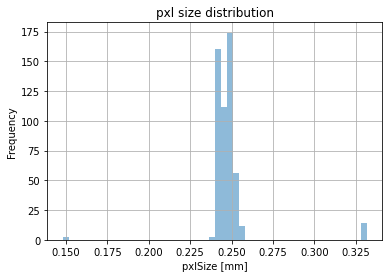

In [3]:
ax = df_data[df_data["frame"] == 0]['pxlSize'].plot.hist(bins=50, alpha=0.5)
ax.set_xlabel('pxlSize [mm]')
ax.set_title("pxl size distribution")
plt.grid()
plt.show()
plt.close()

## GMM of pxlSize distribution

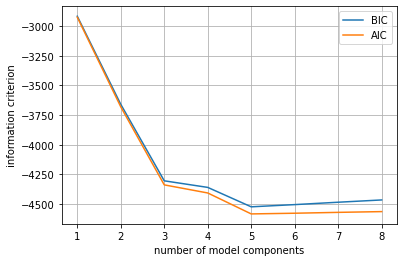

,components,BIC,AIC
0,1,-2916.064783,-2924.618069
1,2,-3659.376565,-3680.759783
2,3,-4304.771223,-4338.984371
3,4,-4360.311341,-4407.354419
4,5,-4524.194753,-4584.067762
5,6,-4505.529601,-4578.232540
6,7,-4485.425760,-4570.958629
7,8,-4466.201123,-4564.563923


In [4]:
gm = GMM1d(data = x,
           max_components = 8,
           iterations = 10)
gm.plot_fit_procedure()
gm.fitResult

## Bayesian GMM of pxlSize distribution

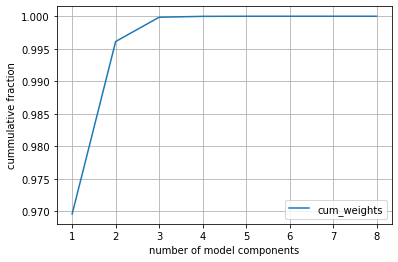

,components,weights,mu,sigma,cum_weights
0,1,9.696074e-01,0.246291,0.003869,0.969607
1,2,2.650389e-02,0.326121,0.021308,0.996111
2,3,3.736870e-03,0.183106,0.048934,0.999848
3,4,1.349965e-04,0.248166,0.015445,0.999983
4,5,1.499936e-05,0.248166,0.015445,0.999998
5,6,1.666596e-06,0.248166,0.015445,1.000000
6,7,1.851773e-07,0.248166,0.015445,1.000000
7,8,2.057525e-08,0.248166,0.015445,1.000000


In [5]:
bgm = BGMM1d(data = x,
             max_components = 8,
             iterations = 10)
    
bgm.plot_fit_procedure()
bgm.fitResult

## 3-component GMM model

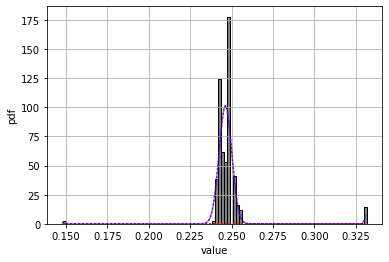

,component,weight,mu,sigma
0,0,0.969925,0.246288,0.003812
1,1,0.026316,0.331731,0.001001
2,2,0.003759,0.147902,0.001000


In [6]:
number_of_components = 3
gm.plot_model(number_of_components)
df_model = gm.df_model(3)
df_model

## Analysis of 3-component GMM model

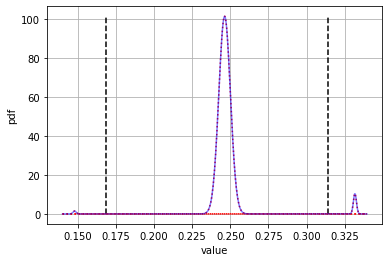

Integrated model error is 5.698e-71


,component_1,component_2,value
0,0.0,2.0,0.168186
1,0.0,1.0,0.314055


In [7]:
bdr = Bayes_decision_rules(df_model, x_min = 0.14, x_max = 0.34)
bdr.fit()
bdr.plot_model()
print("Integrated model error is %.3e" %(bdr.error))
bdr.fitResult

## Bayesian decision rules for 3-component GMM

In [8]:
bdr.rules()

,compound,rule
0,2.0,if 1.400e-01 < x and x <= 1.682e-01
1,0.0,if 1.682e-01 < x and x <= 3.141e-01
2,1.0,if 3.141e-01 < x and x <= 3.400e-01


In [9]:
df_filtered = df_data[df_data["pxlSize"] < bdr.fitResult["value"].values[0]]
df_filtered = df_filtered.append(df_data[df_data["pxlSize"] > bdr.fitResult["value"].values[1]])
df_filtered

,Unnamed: 0,Id,day,time,frame,effect,pxlSize,median,mean,std,min,max,thr,application_type,pxlSize_bl,median_bl,mean_bl,std_bl,min_bl,max_bl
44,44,2,1,-15,0,allodynia,0.147902,62.0,62.023730,15.225224,1,124,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
45,45,2,1,-15,1,allodynia,0.147902,54.0,53.482463,13.337962,9,116,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
46,46,2,1,-15,2,allodynia,0.147902,54.0,53.612236,13.561692,8,110,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
65,65,2,1,-15,0,sec_hyperalgesia,0.147902,62.0,62.023730,15.225224,1,124,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
66,66,2,1,-15,1,sec_hyperalgesia,0.147902,54.0,53.482463,13.337962,9,116,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
67,67,2,1,-15,2,sec_hyperalgesia,0.147902,54.0,53.612236,13.561692,8,110,NaN,i.c.,0.147902,62.0,62.023730,15.225224,1.0,124.0
924,924,13,2,-15,0,allodynia,0.331753,54.0,52.888059,12.045884,9,99,NaN,i.c.,0.331753,54.0,52.888059,12.045884,9.0,99.0
925,925,13,2,-15,1,allodynia,0.331753,54.0,53.106916,12.036628,11,100,NaN,i.c.,0.331753,54.0,52.888059,12.045884,9.0,99.0
926,926,13,2,15,0,allodynia,0.331753,56.0,67.029760,42.171638,1,363,355.0,i.c.,0.331753,54.0,52.888059,12.045884,9.0,99.0
927,927,13,2,15,1,allodynia,0.331753,51.0,62.665334,42.083131,6,325,319.0,i.c.,0.331753,54.0,52.888059,12.045884,9.0,99.0
